In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras import callbacks
from keras import layers

### **Loading Data**

In [318]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##### **About to Data**

In [319]:
# age:  Age of the patient
# anaemia: If the patient had the haemoglobin below the normal range
# creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
# diabetes: If the patient was diabetic
# ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
# high_blood_pressure: If the patient had hypertension
# platelets: Platelet count of blood in kiloplatelets/mL
# serum_creatinine: The level of serum creatinine in the blood in mg/dL
# serum_sodium: The level of serum sodium in the blood in mEq/L
# sex: The sex of the patient
# smoking: If the patient smokes actively or ever did in past
# time: It is the time of the patient's follow-up visit for the disease in months
# DEATH_EVENT: If the patient deceased during the follow-up period

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [321]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


### **Data Analysis**

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

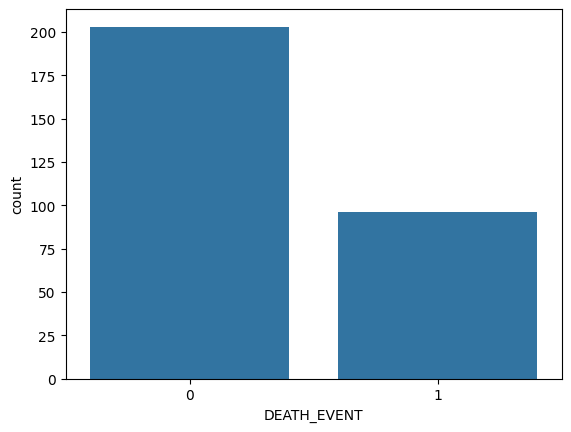

In [322]:
sns.countplot(x=df["DEATH_EVENT"])

<Axes: >

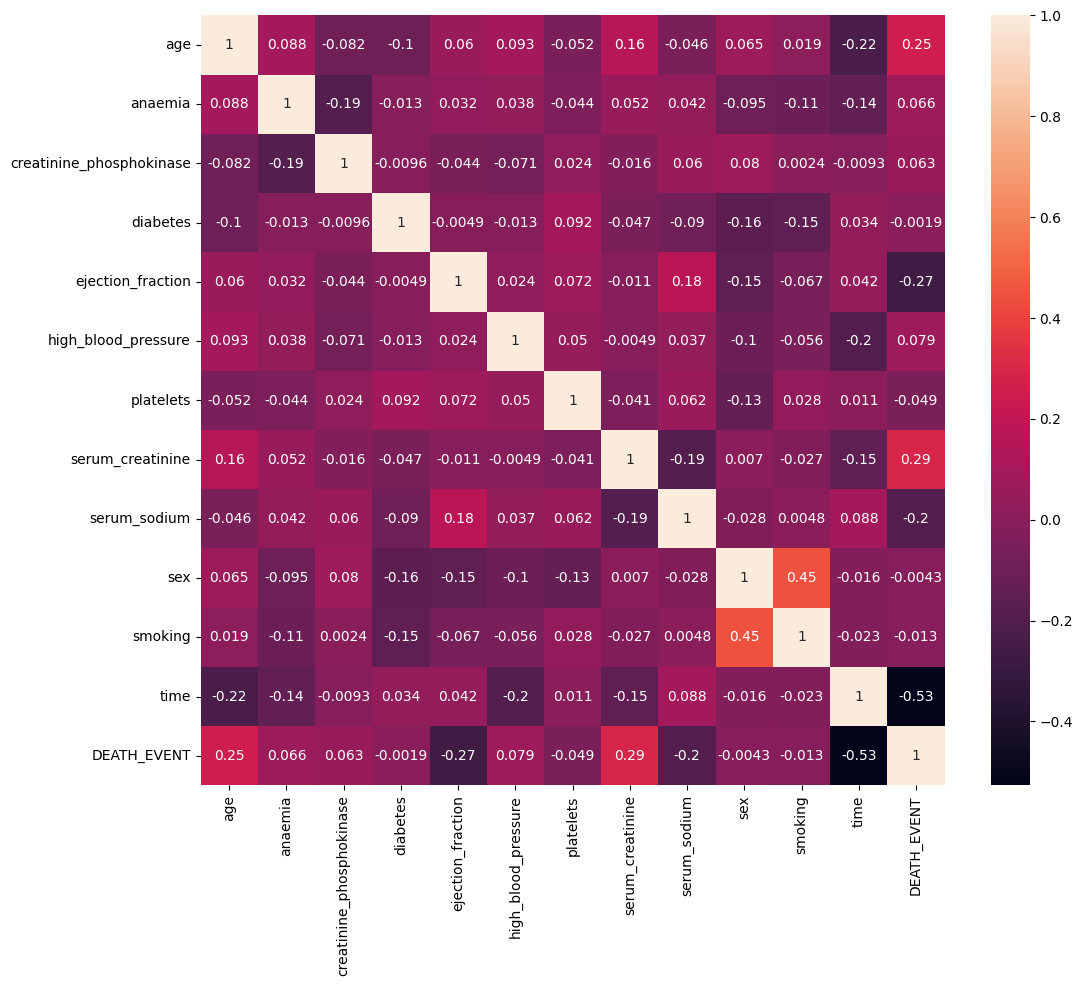

In [323]:
plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(df.corr(), annot= True)

Text(0.5, 1.0, 'Distribution Of Age')

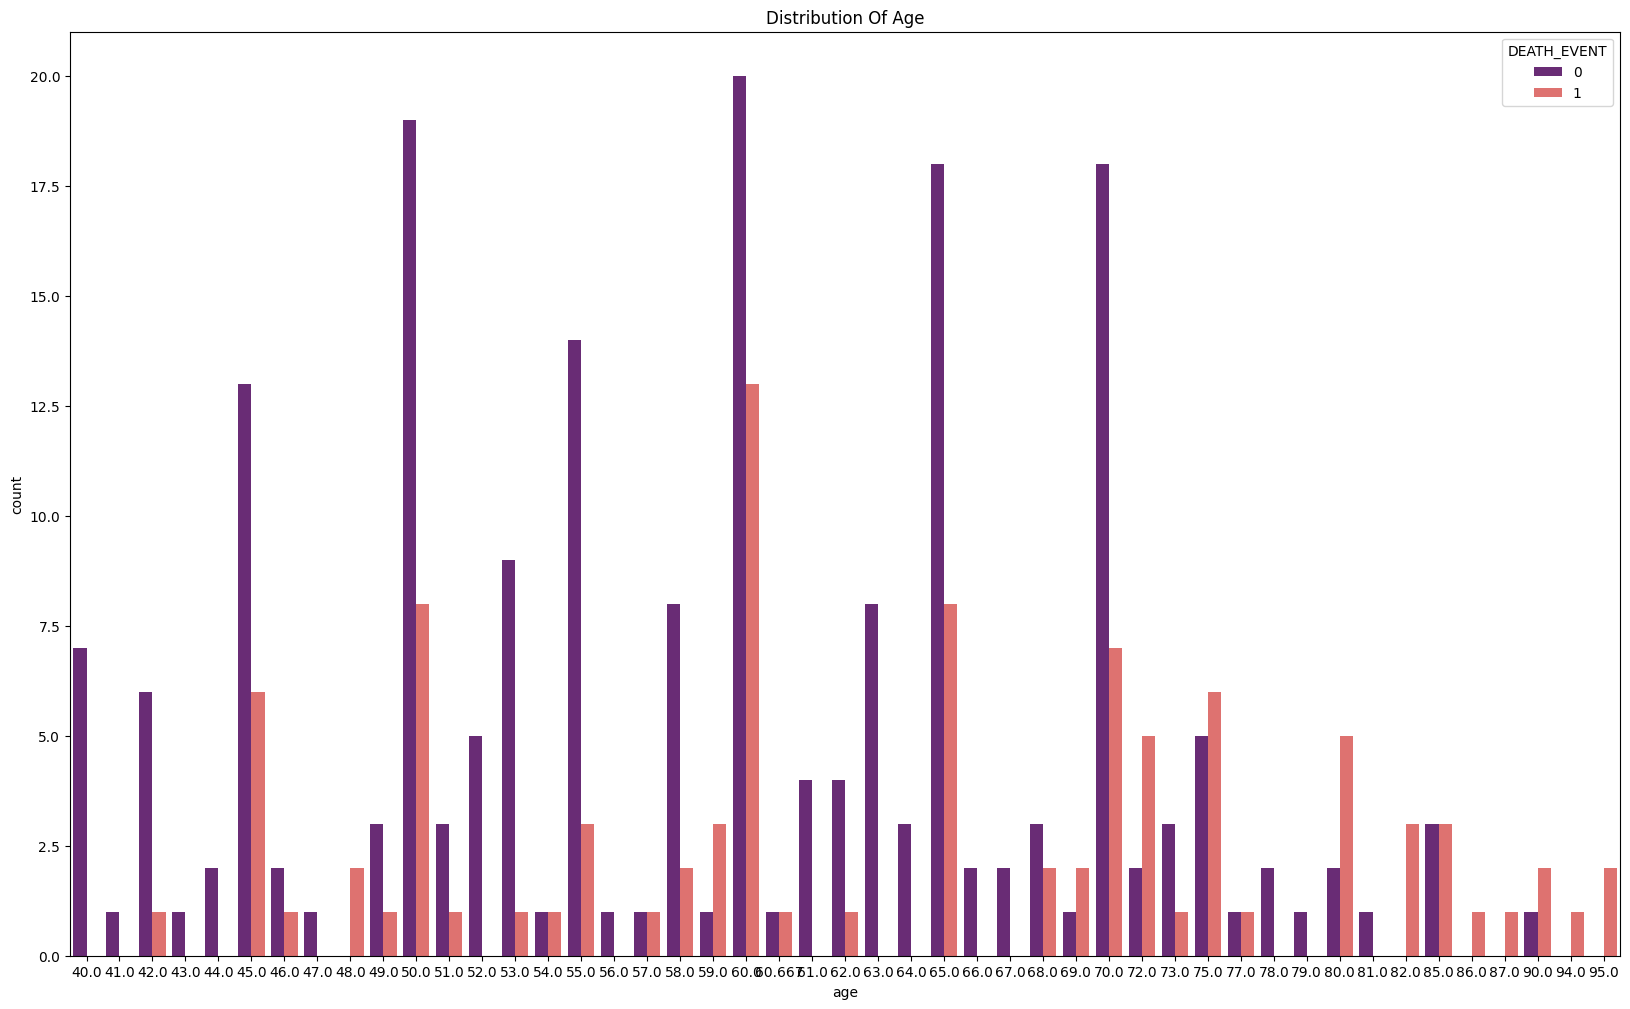

In [324]:
plt.figure(figsize=(20,12))
Days_of_week=sns.countplot(x=df['age'],data=df, hue ="DEATH_EVENT",palette = "magma")
Days_of_week.set_title("Distribution Of Age", color="black")

### **Data Preprocessing**

##### X and y

In [325]:
X = df.drop("DEATH_EVENT", axis= 1)
y = df["DEATH_EVENT"]

##### Standart Scaler

In [326]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

##### Train Test Split

In [327]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=9)

## **Building Model**

In [328]:
early_stopping = callbacks.EarlyStopping(min_delta= 0.001,
                                         patience=5,
                                         restore_best_weights= True)

model = Sequential([
    layers.Dense(64, kernel_initializer="he_normal", activation="relu", input_dim=12),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    

    layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
   
    layers.Dense(64, kernel_initializer="he_normal", activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    
    layers.Dense(1, activation="sigmoid")
    ])


# model compile
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# model fitting

optimizer = Adam(learning_rate=0.001)
history = model.fit(X_train, y_train, batch_size=32, epochs=500, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500


C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.4822 - loss: 1.1741 - val_accuracy: 0.5714 - val_loss: 0.7569
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5546 - loss: 0.9984 - val_accuracy: 0.6190 - val_loss: 0.6882
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5072 - loss: 0.9816 - val_accuracy: 0.6190 - val_loss: 0.6442
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5470 - loss: 0.9605 - val_accuracy: 0.6667 - val_loss: 0.6064
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5320 - loss: 0.9659 - val_accuracy: 0.7381 - val_loss: 0.5800
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4891 - loss: 0.9807 - val_accuracy: 0.7619 - val_loss: 0.5594
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5732 - loss: 0.8329 - val_accuracy: 0.7619 - val_loss: 0.5459
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5933 - loss: 0.7482 - val_accuracy: 0.7857 - val_loss: 0.5314
Epoc

In [329]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 77.10%


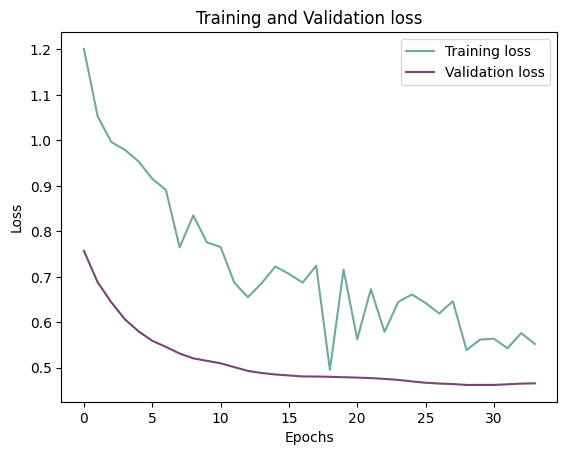

In [330]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

In [331]:
# Parametrelerle oynayarak val_accuracyi yükseltmeye çalıştım ama pek fark etmedi

# 1- İlk olarak %70 doğruluk çıktı ardından katman sayısı arttırdım
# 2- Grafiğe baktığımda overfitting gördüğüm için 0.4 olan Dropout oranını 0.5 yaptım bunu yapınca val_accuracy %75 oldu
# Ardından optimizerdaki learning_rate düşürdüm overfittingi azaltmak için 0.0003 yapınca bu sefer val_accuracy %69 a düştü